In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
import pandasql as ps

In [3]:
from ipywidgets import interact
import ipywidgets as widgets 

In [4]:
stats = pd.read_csv("athlete_events.csv.zip", compression = 'zip')
regions = pd.read_csv("noc_regions.csv")
stats

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


# DATA CLEANING
**removing some NaN ,filtering only for summer olympic, merging with regions csv with stats csv**

In [7]:
stats = stats[stats['Season'] == 'Summer']
stats = stats.merge(regions, on = 'NOC', how = 'inner')

In [8]:
stats = stats[['ID','Name','Sex','Age','Height','Weight','Team','NOC','region','Year','City','Sport','Event','Medal']]
stats.columns = stats.columns.str.lower()
stats

,id,name,sex,age,height,weight,team,noc,region,year,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,China,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,China,2012,London,Judo,Judo Men's Extra-Lightweight,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,China,2000,Sydney,Boxing,Boxing Men's Middleweight,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,China,2004,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,China,2016,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,Lesotho,2008,Beijing,Athletics,Athletics Women's Marathon,NaN
222199,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,Lesotho,2012,London,Athletics,Athletics Women's Marathon,NaN
222200,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,Lesotho,1996,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
222201,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,Lesotho,1984,Los Angeles,Boxing,Boxing Men's Welterweight,NaN


In [9]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222203 entries, 0 to 222202
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      222203 non-null  int64  
 1   name    222203 non-null  object 
 2   sex     222203 non-null  object 
 3   age     213026 non-null  float64
 4   height  170434 non-null  float64
 5   weight  168439 non-null  float64
 6   team    222203 non-null  object 
 7   noc     222203 non-null  object 
 8   region  222182 non-null  object 
 9   year    222203 non-null  int64  
 10  city    222203 non-null  object 
 11  sport   222203 non-null  object 
 12  event   222203 non-null  object 
 13  medal   34079 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 25.4+ MB


In [10]:
stats.dropna(subset = ['region'], inplace = True)
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222182 entries, 0 to 222202
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      222182 non-null  int64  
 1   name    222182 non-null  object 
 2   sex     222182 non-null  object 
 3   age     213007 non-null  float64
 4   height  170418 non-null  float64
 5   weight  168421 non-null  float64
 6   team    222182 non-null  object 
 7   noc     222182 non-null  object 
 8   region  222182 non-null  object 
 9   year    222182 non-null  int64  
 10  city    222182 non-null  object 
 11  sport   222182 non-null  object 
 12  event   222182 non-null  object 
 13  medal   34079 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 25.4+ MB


In [11]:
athlete = ps.sqldf("SELECT id,name,sex,age,height,weight,year FROM stats GROUP BY id,name,sex,age,height,weight,year")
athlete

,id,name,sex,age,height,weight,year
0,1,A Dijiang,M,24.0,180.0,80.0,1992
1,2,A Lamusi,M,23.0,170.0,60.0,2012
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,1920
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,1900
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,1932
...,...,...,...,...,...,...,...
158616,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,2004
158617,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,1972
158618,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,2000
158619,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,2004


# Initial Exploration

         height
count  10978.00
mean     176.70
std       11.25
min      133.00
25%      169.00
50%      176.00
75%      184.00
max      218.00


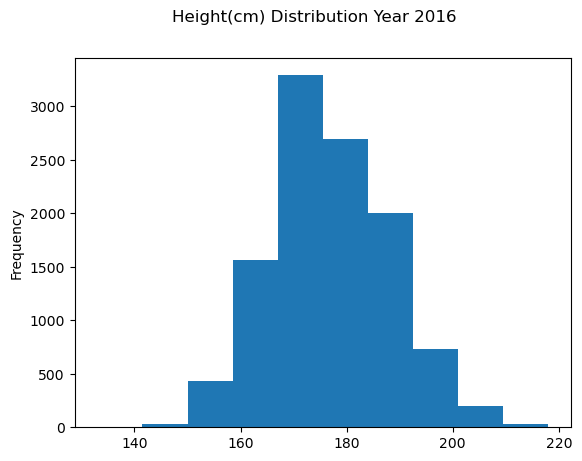

In [12]:
pd.set_option('display.precision', 2)
h = ps.sqldf("SELECT height FROM athlete WHERE Year = 2016")
print(h.describe())
h.plot.hist(legend = False)
plt.gcf().suptitle("Height(cm) Distribution Year 2016");

         weight
count  10942.00
mean      71.94
std       16.13
min       30.00
25%       60.00
50%       70.00
75%       81.00
max      170.00


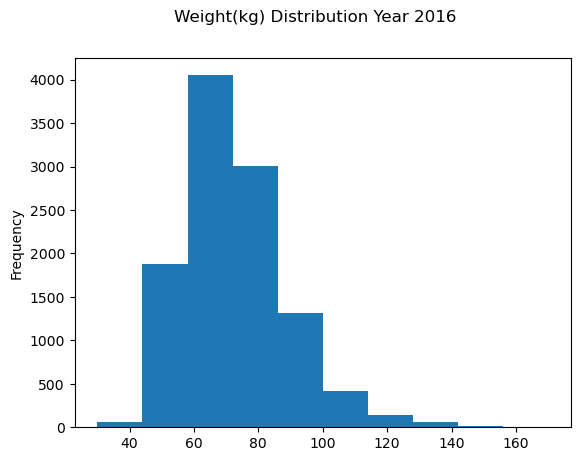

In [13]:
w = ps.sqldf("SELECT weight FROM athlete WHERE Year = 2016")
print(w.describe())
w.plot.hist(legend = False)
plt.gcf().suptitle("Weight(kg) Distribution Year 2016");

In [14]:
@interact(yr = widgets.Dropdown(
    options= sorted(list(stats['year'].unique())),
    value= 2016,
    description='Year:',
    disabled=False,
))
def age_dist(yr):
    a = ps.sqldf("SELECT age FROM athlete WHERE Year = {}".format(yr))
    print(a.describe())
    fig, ax = plt.subplots()
    ax.twinx()
    fig.suptitle("Age Distribution Year {}".format(yr))
    ax.hist(a)

interactive(children=(Dropdown(description='Year:', index=28, options=(1896, 1900, 1904, 1906, 1908, 1912, 192…

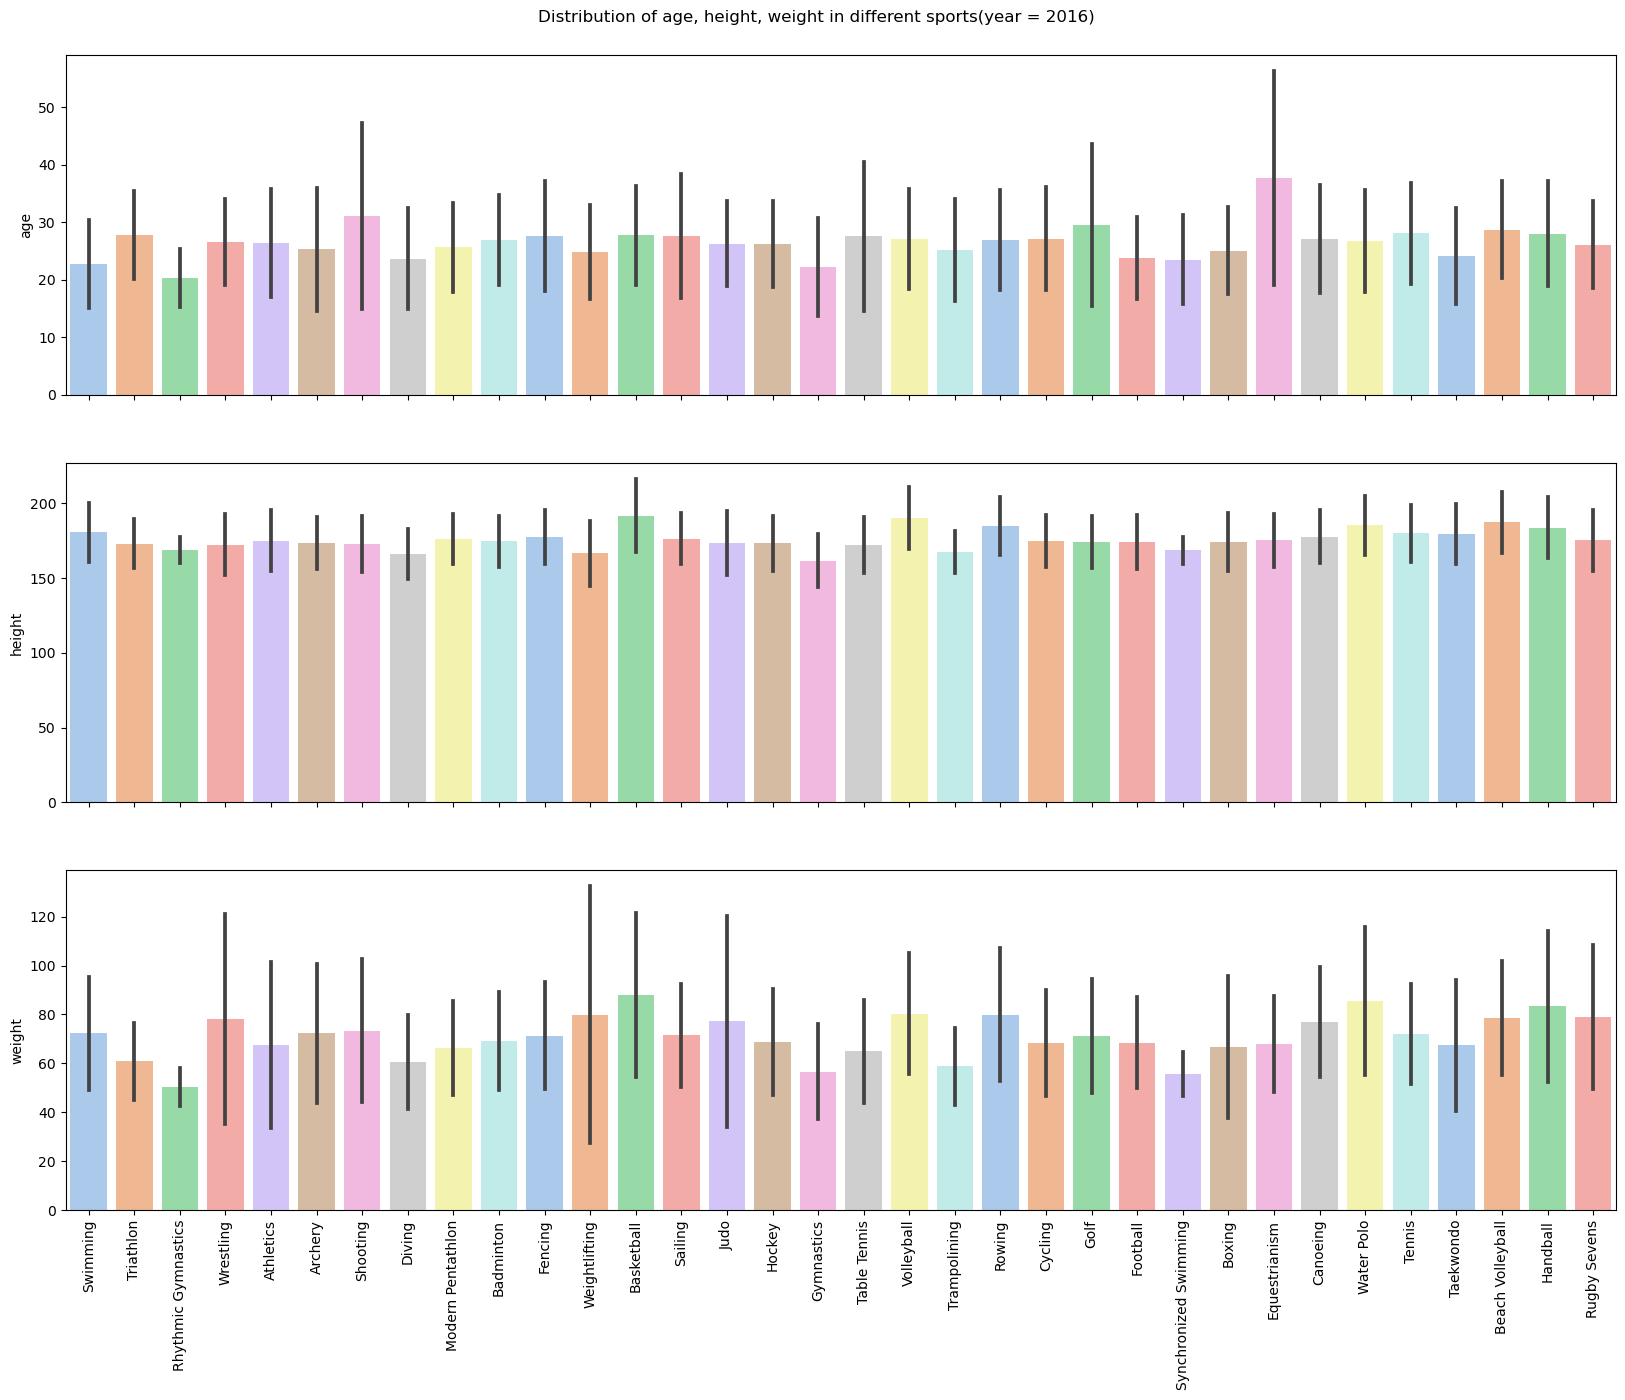

In [15]:
f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,15), sharex = True)
sns.barplot(y = 'age' , x = 'sport', data = stats[stats['year'] == 2016], errorbar = ('sd',2), ax = ax1, palette="pastel")
sns.barplot(y = 'height' , x = 'sport', data = stats[stats['year'] == 2016], errorbar = ('sd',2), ax = ax2, palette="pastel")
sns.barplot(y = 'weight' , x = 'sport', data = stats[stats['year'] == 2016], errorbar = ('sd',2), ax = ax3, palette="pastel")
f.suptitle("Distribution of age, height, weight in different sports(year = 2016)", x =0.5, y = 0.91)
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax3.tick_params(axis = 'x', rotation = 90)
plt.savefig('img.png')

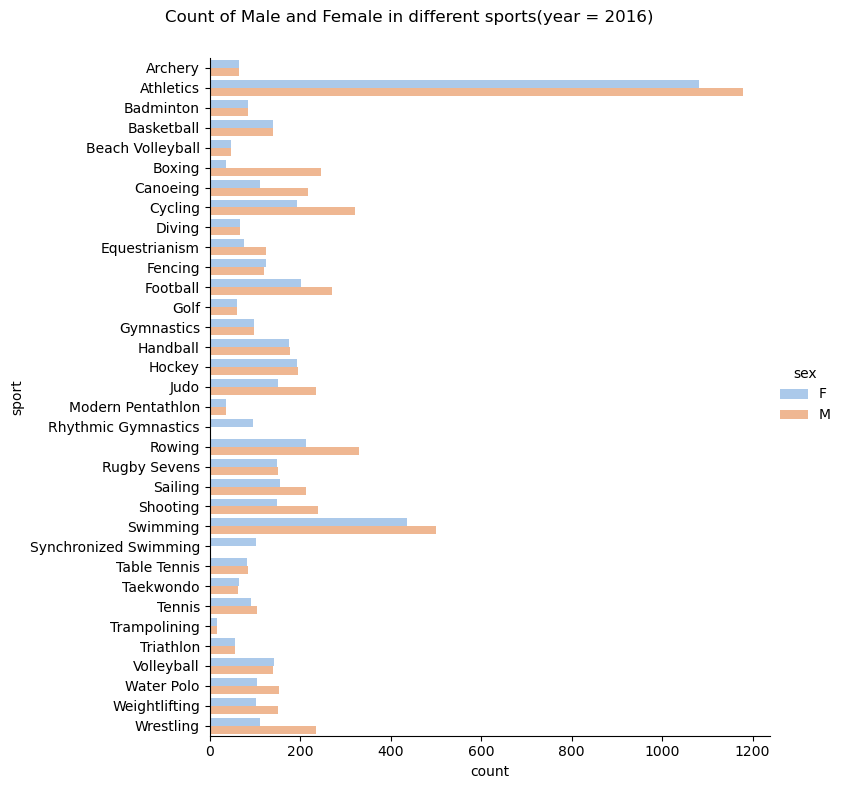

In [16]:
query = """ SELECT sport, id, sex
        FROM stats
        WHERE year = 2016
        GROUP BY sport, id, sex"""
DF = ps.sqldf(query)


graph = sns.catplot(kind = 'count' , y = 'sport', data = DF, hue = 'sex', palette="pastel", height = 8, aspect = 1)
graph.fig.subplots_adjust(top=0.92)
graph.fig.suptitle("Count of Male and Female in different sports(year = 2016)");

In [17]:
mdc = stats[~stats['medal'].isna()]
countries = list(sorted(stats['region'].unique()))
mdc = pd.pivot_table(mdc, values = 'medal', index = 'year', columns = 'region', aggfunc = len)
countries
@interact(country=widgets.SelectMultiple(
    options= countries,
    value= [countries[-14]],
    description='Countries'))
def dist1(country):
    plt.figure(figsize = (15,8))
    ax = plt.gca()
    ax.plot(mdc[list(country)], 'o-', label = country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Medal Count')
    ax.set_xticks(np.arange(1896, 2020, 4))
    ax.tick_params(axis='both', labelsize = 8)
    ax.legend()

# Select or Ctrl Select to see multiple
# Select or Ctrl Select to see multiple

interactive(children=(SelectMultiple(description='Countries', index=(191,), options=('Afghanistan', 'Albania',…

# QUESTIONS

# How has the number of participating countries changed over time ?

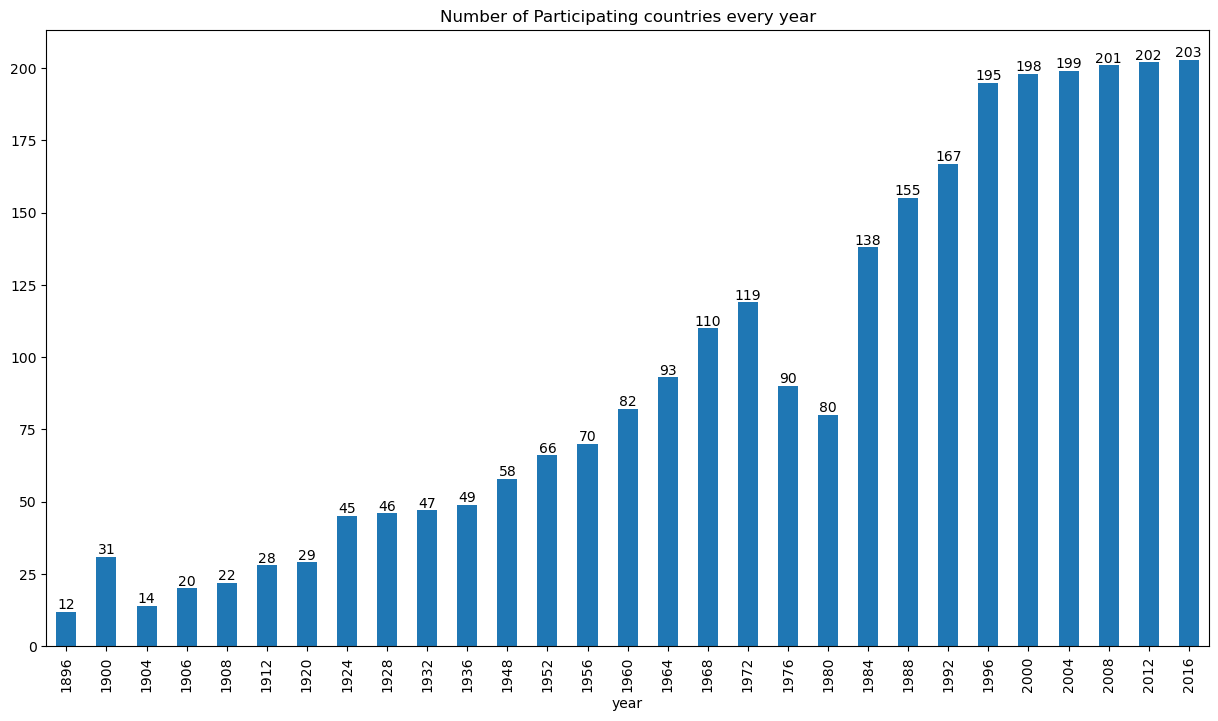

In [18]:
q2 = """ SELECT year, COUNT(DISTINCT region) as countries
        FROM stats
        GROUP BY year
        ORDER BY year
"""
num_countries = ps.sqldf(q2)
num_countries.plot.bar(x = 'year',y = 'countries', legend = False, figsize = (15,8))
plt.title("Number of Participating countries every year");
for index, value in enumerate(num_countries['countries']):
    plt.text(index, value+1,str(value), ha='center')

# How has the Number of Sports changed over time?

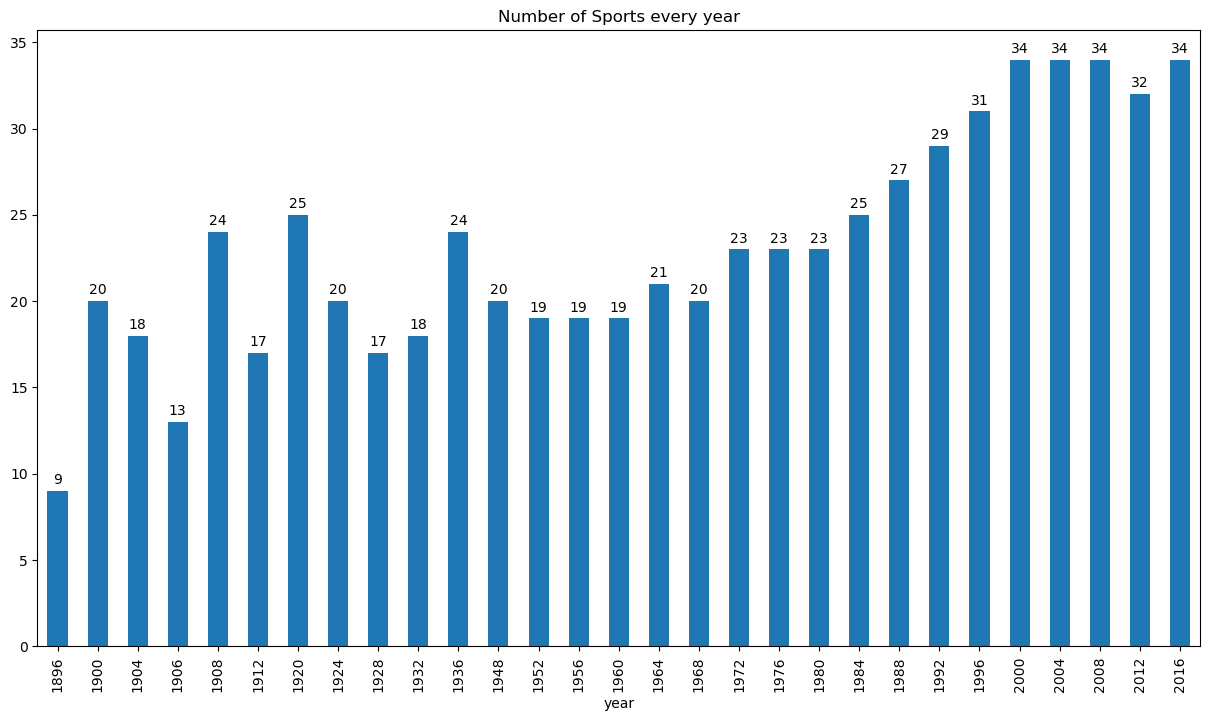

In [19]:
q3 = """SELECT year, Count(DISTINCT sport) as num_sports
       FROM stats
       GROUP BY year 
       ORDER BY year"""

num_sport = ps.sqldf(q3)
num_sport.plot.bar(x = 'year', y = 'num_sports', legend = False, figsize = (15,8))
plt.title("Number of Sports every year");
for index, value in enumerate(num_sport['num_sports']):
    plt.text(index, value+0.4,str(value), ha='center')

# Which countries have won the most medals in the Summer Olympics ?

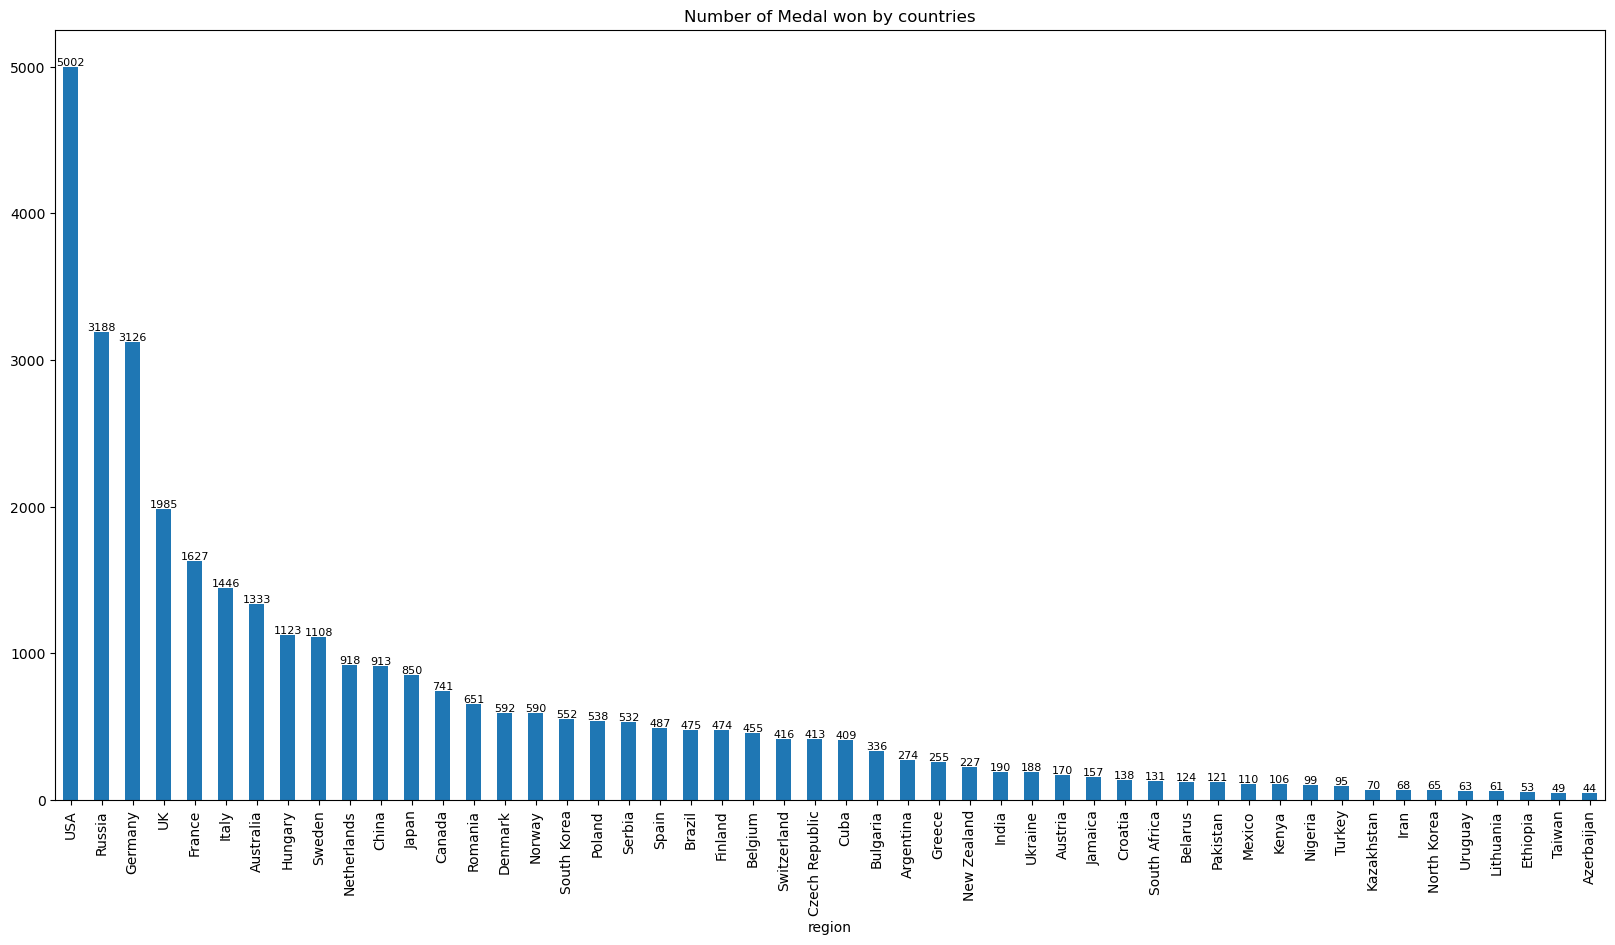

In [20]:
q4 = """SELECT region, Count(Medal) as count, SUM(CASE WHEN medal = 'Gold' THEN 1 ELSE 0 END) as gold
       FROM stats 
       WHERE Medal IS NOT NULL
       GROUP BY region 
       ORDER BY count DESC"""

num_medal = ps.sqldf(q4)
num_medal.iloc[:50].plot.bar(x = 'region', y = 'count', legend = False, figsize = (20,10))
plt.title("Number of Medal won by countries")
for index, value in enumerate(num_medal.loc[:49,'count']):
    plt.text(index, value+10,str(value), ha='center', fontsize = 8);

# How has the number of male and female athletes changed over time ?

    year  num_female  num_male
0   1896           0       176
1   1900          23      1201
2   1904           6       644
3   1906           6       835
4   1908          44      1980
5   1912          53      2354
6   1920          78      2598
7   1924         156      3100
8   1928         312      2935
9   1932         201      1721
10  1936         361      4123
11  1948         446      3955
12  1952         520      4407
13  1956         382      2916
14  1960         613      4734
15  1964         680      4457
16  1968         783      4771
17  1972        1058      6049
18  1976        1259      4810
19  1980        1123      4136
20  1984        1569      5224
21  1988        2202      6244
22  1992        2720      6652
23  1996        3512      6813
24  2000        4062      6571
25  2004        4290      6251
26  2008        4594      6277
27  2012        4638      5853
28  2016        5014      6129


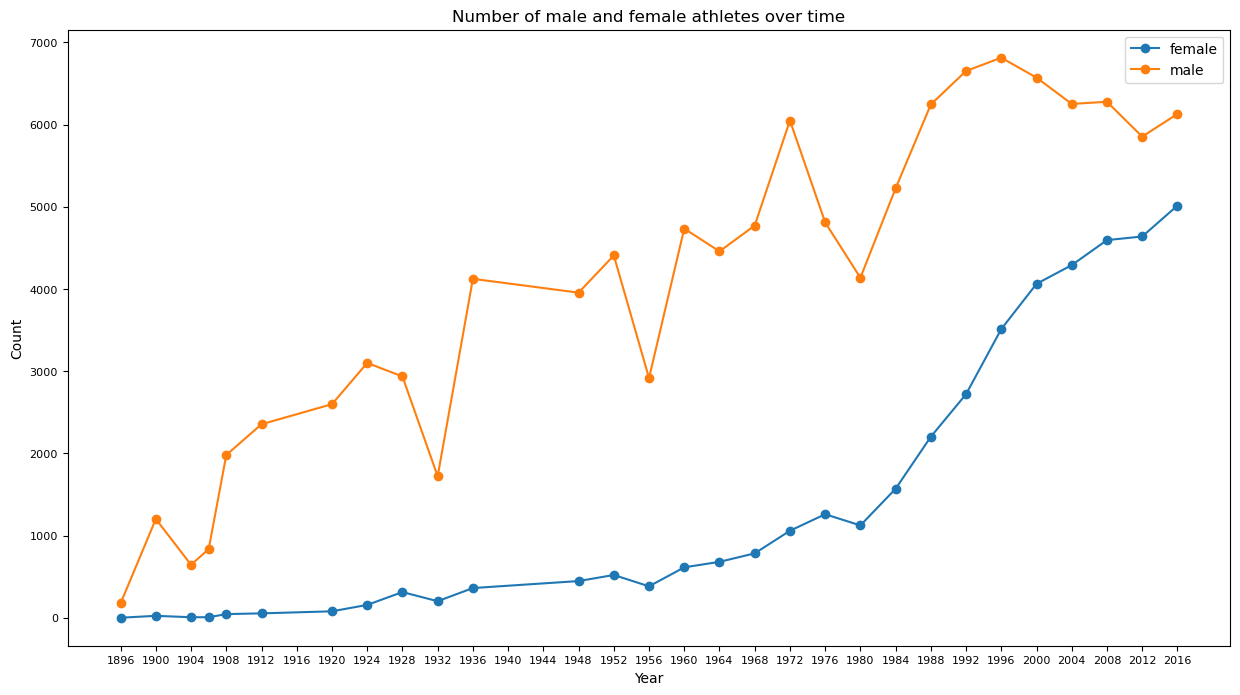

In [21]:
q5 = """SELECT year, SUM(CASE WHEN sex = 'F' THEN 1 ELSE 0 END) as num_female, SUM(CASE WHEN sex = 'M' THEN 1 ELSE 0 END) as num_male
       FROM athlete 
       GROUP BY year 
       ORDER BY year"""

f = ps.sqldf(q5)
print(f)
plt.figure(figsize = (15,8))
plt.plot(f['year'], f['num_female'], 'o-', label = 'female')
plt.plot(f['year'], f['num_male'], 'o-', label = 'male')
plt.title("Number of male and female athletes over time")
plt.legend()
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Count');
plt.gca().set_xticks(np.arange(1896, 2020, 4))
plt.gca().tick_params(axis='both', labelsize = 8);

# Which athletes have won the most  medals in olympic history?
**Top 10**

In [22]:
q6 = """SELECT name,
               SUM(CASE WHEN medal ISNULL THEN 0 ELSE 1 END) as Total_medals,
               SUM(CASE WHEN medal = 'Gold' THEN 1 ELSE 0 END) as gold,
               SUM(CASE WHEN medal = 'Silver' THEN 1 ELSE 0 END) as silver,
               SUM(CASE WHEN medal = 'Bronze' THEN 1 ELSE 0 END) as bronze
        FROM stats 
        GROUP BY id,name 
        ORDER BY Total_medals DESC"""

ps.sqldf(q6).head(10)

,name,Total_medals,gold,silver,bronze
0,"Michael Fred Phelps, II",28,23,3,2
1,Larysa Semenivna Latynina (Diriy-),18,9,5,4
2,Nikolay Yefimovich Andrianov,15,7,5,3
3,Edoardo Mangiarotti,13,6,5,2
4,Takashi Ono,13,5,4,4
5,Borys Anfiyanovych Shakhlin,13,7,4,2
6,Natalie Anne Coughlin (-Hall),12,3,4,5
7,Birgit Fischer-Schmidt,12,8,4,0
8,Sawao Kato,12,8,3,1
9,Ryan Steven Lochte,12,6,3,3


# Which sports are dominated by which countries ? 

**Metric: Total Medals**

In [23]:
df = stats.copy()
df['medal'] = df['medal'].replace({np.nan: 0, 'Gold':1, 'Silver':1, 'Bronze': 1})
pt = pd.pivot_table(df, values = 'medal', index = 'sport', columns = 'region', aggfunc = sum)
pt['country'] = pt.idxmax(axis = 1)
pt['medals'] = pt.apply(lambda r: r[r['country']], axis = 1)
pt[['country', 'medals']]

region,country,medals
sport,,
Aeronautics,Switzerland,1.0
Alpinism,Germany,2.0
Archery,South Korea,69.0
Art Competitions,Germany,26.0
Athletics,USA,1080.0
Badminton,China,64.0
Baseball,Cuba,112.0
Basketball,USA,341.0
Basque Pelota,Spain,2.0


**Metric : Gold Medals**

In [24]:
df1 = stats.copy()
df1['medal'] = df1['medal'].replace({np.nan: 0, 'Gold':1, 'Silver':0, 'Bronze':0})
gm = pd.pivot_table(df1, values = 'medal', index = 'sport', columns = 'region', aggfunc = sum)
gm['country'] = gm.idxmax(axis = 1)
gm['gold medals'] = gm.apply(lambda r: r[r['country']], axis = 1)
gm[['country', 'gold medals']]

region,country,gold medals
sport,,
Aeronautics,Switzerland,1.0
Alpinism,Germany,2.0
Archery,South Korea,49.0
Art Competitions,Germany,9.0
Athletics,USA,542.0
Badminton,China,28.0
Baseball,Cuba,64.0
Basketball,USA,281.0
Basque Pelota,Spain,2.0


# How does athletes age,height,weight affect performance(medal count) ?
**sport - swimming, year - 2016**

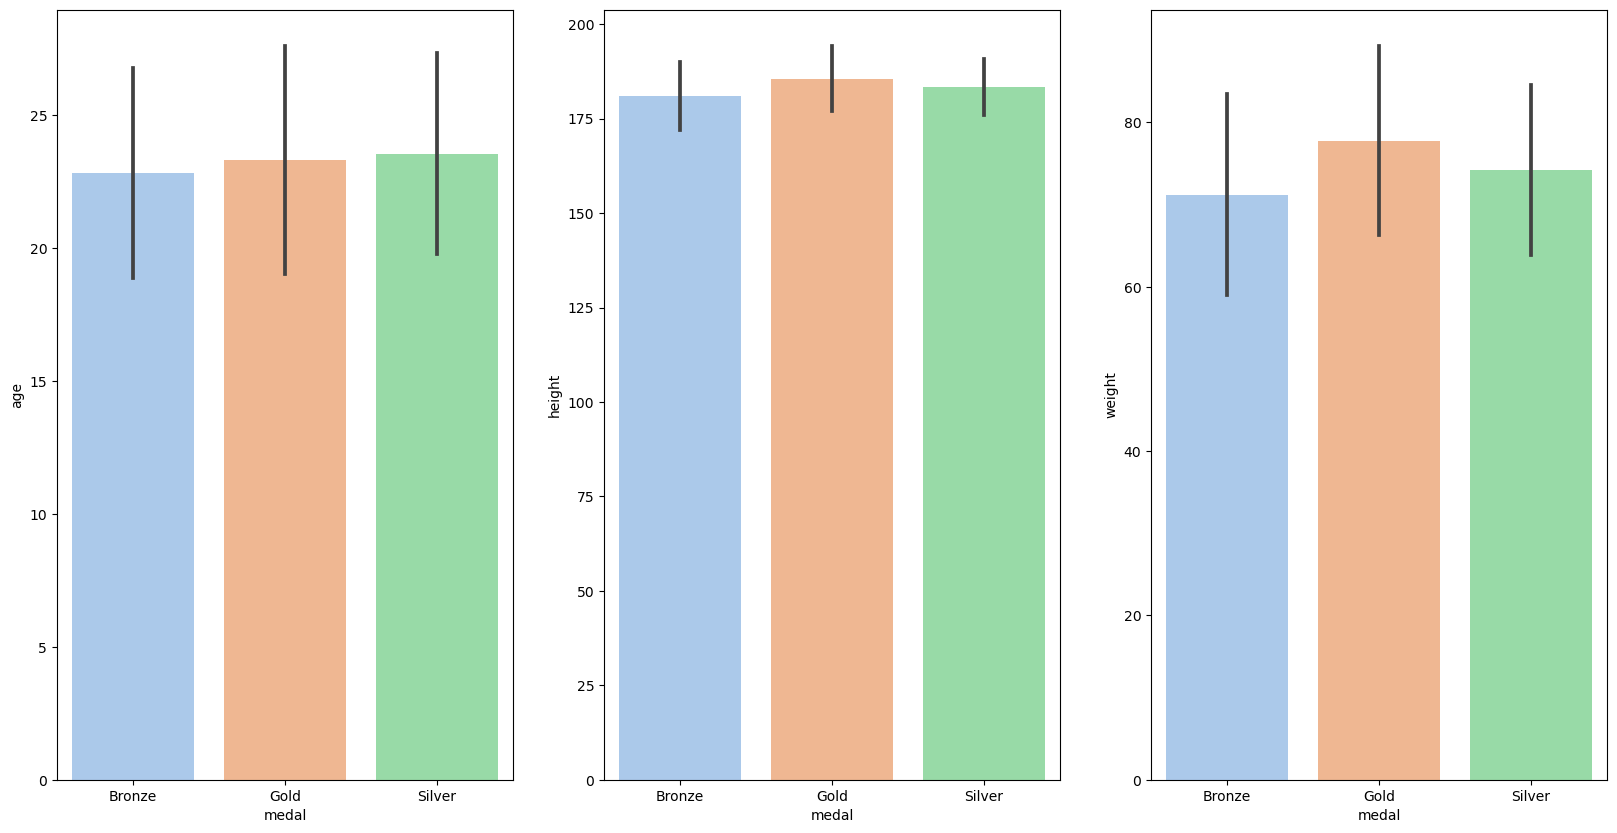

In [25]:
ahw = stats.copy()
ahw = ahw[(ahw['sport'] == 'Swimming') & (ahw['year'] == 2016) & (~ahw['medal'].isna())]

ahw = ahw[['age', 'height', 'weight', 'medal']]

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,10))
sns.barplot(x = 'medal' , y = 'age', data = ahw, errorbar = ('sd'), ax = ax1, palette="pastel")
sns.barplot(x = 'medal' , y = 'height', data = ahw, errorbar = ('sd'), ax = ax2, palette="pastel")
sns.barplot(x = 'medal' , y = 'weight', data = ahw, errorbar = ('sd'), ax = ax3, palette="pastel");

# How does the number of medals won correlate with country’s GDP per capita?

**USA**

In [26]:
gdp = pd.read_excel('5358450.xls', header  = 3)
gdp_usa = gdp.iloc[251]
gdp_usa = gdp_usa.iloc[4:]
gdp_usa = pd.to_numeric(gdp_usa)
gdp_usa.index = pd.to_numeric(gdp_usa.index)
gdp_usa = pd.DataFrame(gdp_usa)
gdp_usa = gdp_usa.rename(columns = {251: 'GDP per capita'})

md_usa = mdc[['USA']].dropna()

perf_v_gdp_usa = md_usa.merge(gdp_usa, right_index = True, left_index = True, how = 'left')
perf_v_gdp_usa = perf_v_gdp_usa.dropna()
perf_v_gdp_usa

,USA,GDP per capita
year,,
1960,125.0,3007.12
1964,169.0,3573.94
1968,166.0,4695.92
1972,171.0,6094.02
1976,164.0,8592.25
1984,352.0,17121.23
1988,207.0,21417.01
1992,224.0,25418.99
1996,259.0,29967.71


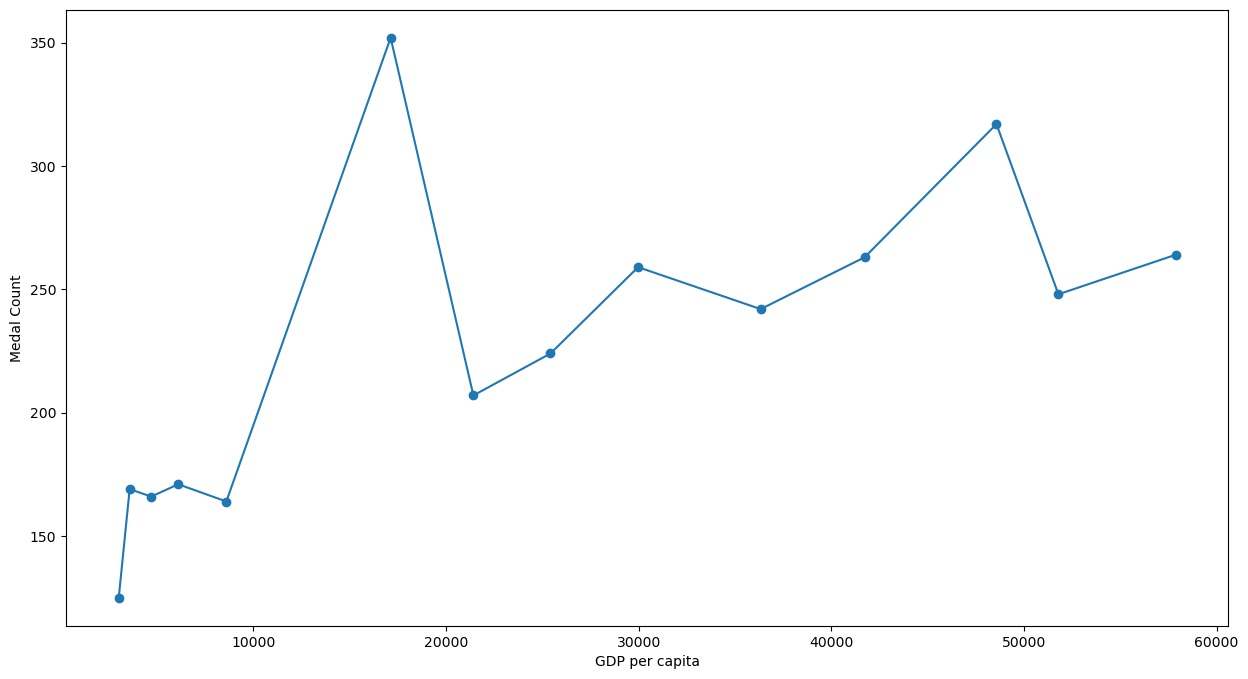

In [27]:
plt.figure(figsize = (15,8))
plt.plot(perf_v_gdp_usa['GDP per capita'], perf_v_gdp_usa['USA'], '-o', label = 'USA')
plt.gca().set_xlabel('GDP per capita')
plt.gca().set_ylabel('Medal Count');

In [28]:
c4 = scipy.stats.pearsonr(perf_v_gdp_usa['GDP per capita'],perf_v_gdp_usa['USA'])
c4

PearsonRResult(statistic=0.6698466328369534, pvalue=0.00877063273873163)

# How does the athelete count of countries correlate with its performance(medal count)?
**year = 2016**

In [29]:
q8 = """SELECT region, SUM(CASE WHEN medal IS NULL THEN 0 ELSE 1 END) as medal_count, COUNT(DISTINCT id) as athlete_count
       FROM stats
       WHERE year = 2016 
       GROUP BY region
       order by medal_count DESC
       """
c = ps.sqldf(q8)
c

,region,medal_count,athlete_count
0,USA,264,555
1,Germany,159,418
2,UK,145,360
3,Russia,115,284
4,China,113,429
...,...,...,...
198,Angola,0,26
199,Andorra,0,4
200,American Samoa,0,4
201,Albania,0,6


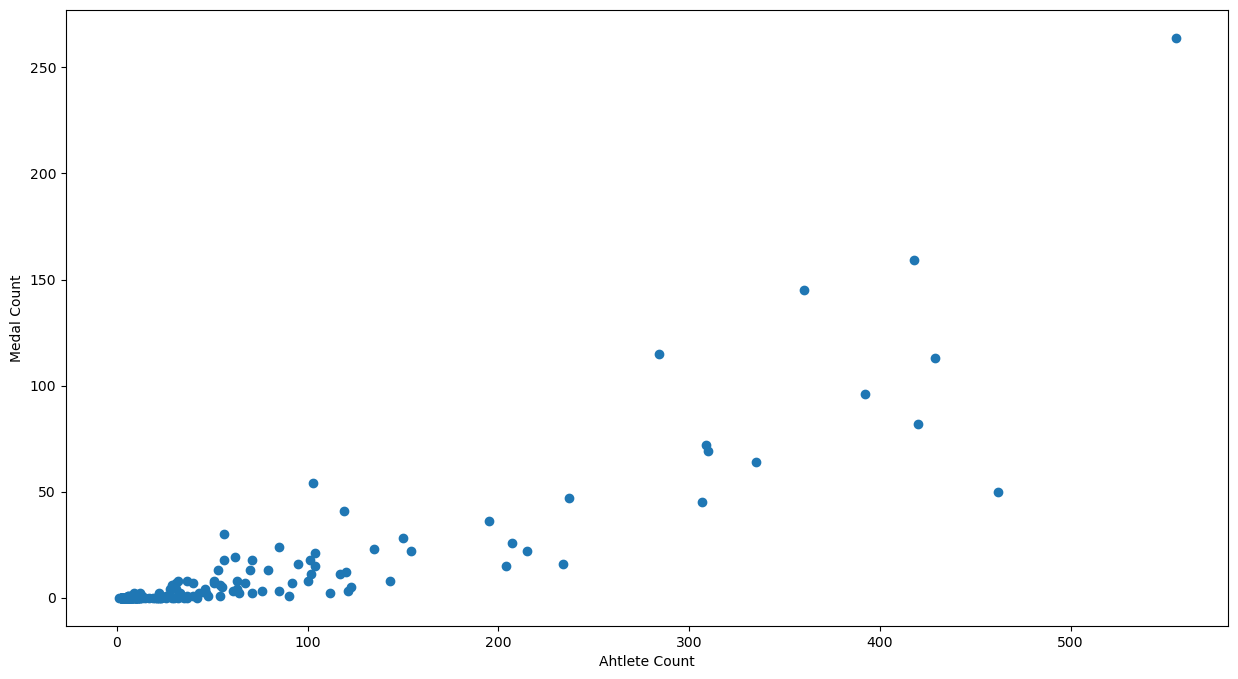

In [30]:
plt.figure(figsize = (15,8))
plt.plot(c['athlete_count'], c['medal_count'], 'o')
plt.gca().set_xlabel('Ahtlete Count')
plt.gca().set_ylabel('Medal Count');

In [31]:
c6 = scipy.stats.pearsonr(c['athlete_count'], c['medal_count'])
c6

PearsonRResult(statistic=0.8704132288491329, pvalue=8.942668717493107e-64)

# How does the number of sports countries participate correlate with its performance(medal count)?
**year = 2016**

In [32]:
q9 = """SELECT region, SUM(CASE WHEN medal IS NULL THEN 0 ELSE 1 END) as medal_count, COUNT(DISTINCT sport) as num_sport
       FROM stats
       WHERE year = 2016
       GROUP BY region
       order by medal_count DESC
       """
d = ps.sqldf(q9)
d

,region,medal_count,num_sport
0,USA,264,33
1,Germany,159,29
2,UK,145,26
3,Russia,115,29
4,China,113,32
...,...,...,...
198,Angola,0,7
199,Andorra,0,4
200,American Samoa,0,3
201,Albania,0,3


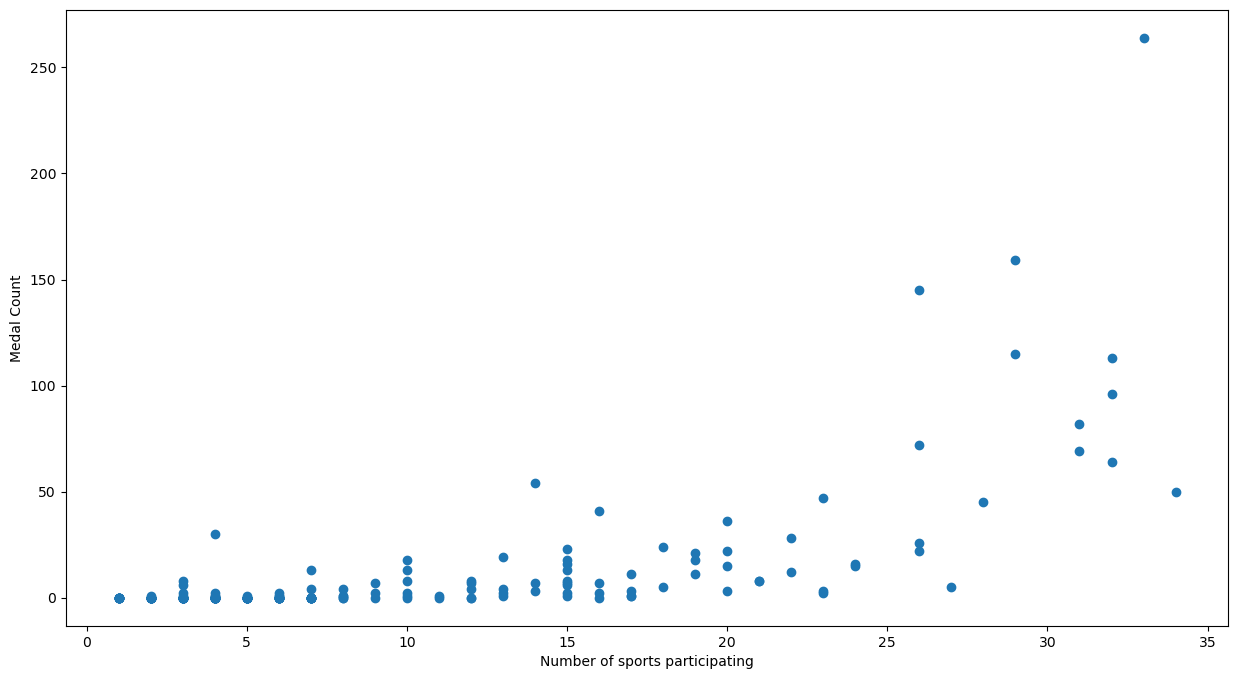

In [33]:
plt.figure(figsize = (15,8))
plt.plot(d['num_sport'], d['medal_count'], 'o')
plt.gca().set_xlabel('Number of sports participating')
plt.gca().set_ylabel('Medal Count');

In [34]:
c7 = scipy.stats.pearsonr(d['num_sport'], d['medal_count'])
c7

PearsonRResult(statistic=0.6664813706355885, pvalue=1.940407194827214e-27)